# TP 2 -Simulation de variables aléatoires continues

In [1]:
import random
import math

## Simulation d'une variable aléatoire exponentielle

La fonction de répartition d'une v.a. exponentielle de paramètre $\lambda$ vaut
$$F_X(x)=\int_{-\infty}^x f_{X}(t) dt,$$
avec $f_X(t)=\lambda e^{-\lambda t}\mathbf{1}|_{\mathbb{R}_+}(t)$. D'où
$$F_X(x)=\int_{0}^x \lambda e^{-\lambda t}(t) dt=[-e^{-\lambda t}]_0^x=1-e^{-\lambda x},$$
pour $x>0$ (et 0 sinon).

On a
$$y=F_X(x)\Leftrightarrow y=1-e^{-\lambda x} \Leftrightarrow e^{-\lambda x}=1-y  \Leftrightarrow -\lambda x=\ln(1-y)\Leftrightarrow x=-\frac{\ln(1-y)}\lambda$$ 

Donc $F^{-1}_X(y)=-\frac{\ln(1-y)}{\lambda}$.


In [3]:
# Simulation d'une observation d'une va exponentielle :
def expObs(lam):
    U=random.random()
    X=-math.log(1-U)/lam  # X=F^-1(U)
    return(X)

def exp(N,lam): #lam : paramètre de la loi exponentielle ; N:taille de l'échantillon
    E=[]
    for k in range(N):
        Obs=expObs(lam)
        E.append(Obs)           # on ajoute cette observation au vecteur
    return(E)
    

In [4]:
# version ultra courte du progamme 
def expCourt(N,lam):
    E=[-math.log(1-random.random())/lam for k in range(N)]
    return E

In [5]:
# premiers essais 
X=exp(10,2)
print(X)
X=expCourt(10,2)
print(X)

[0.2739689171711942, 0.6395185863415379, 0.3942516397281332, 0.6187822344015412, 0.758464698062702, 0.12427131201972806, 0.9098620860543176, 0.11568031530494863, 0.47991534899270993, 1.8401440973922234]
[0.40438738010082353, 0.23102609575902908, 0.058692783476649704, 1.8333577332142896, 1.1118940632062682, 0.8043523131435025, 0.03870679685135846, 0.5484343745827508, 0.012121613479744355, 0.5754697161383382]


Python dispose de fonctions pour calculer la moyenne et la variance d'un vecteur. Il y en a dans les librairies "statistics" et "numpy".
On peut aussi récupérer les programmes qu'on  avait faits au TP1.

In [6]:
import statistics as st
import numpy as np

X=[0,8,8,9,9,20,1,38]
N=len(X)
print("La libraire 'statistics' peut fournir la moyenne de X :", st.mean(X),"et sa variance :",st.variance(X))
print("La libraire 'numpy' aussi :", np.mean(X),"et", np.var(X))


def moy(X):
    return sum(X)/len(X)

def var(X):
    N=len(X)
    M=moy(X) 
    Vx2=[X[k]**2 for k in range(N)]  
    Sx2=moy(Vx2)  
    return Sx2-M**2

print("Par nos progammes maison", moy(X),"et",var(X))



La libraire 'statistics' peut fournir la moyenne de X : 11.625 et sa variance : 150.55357142857142
La libraire 'numpy' aussi : 11.625 et 131.734375
Par nos progammes maison 11.625 et 131.734375


Remarquons que les librairies statistics et numpy ne donnent pas le même résulat concernant la variance. C'est dû au fait que c'est du au fait que statistics donne la variance empirique corrigée et numpy la variance empique non corrigée. Il y a un facteur $\frac{N}{N-1}$ entre les deux

In [7]:
print(np.var(X)*N/(N-1))
print(st.variance(X))

150.55357142857142
150.55357142857142


Nous concernant, cela n'a pas beaucoup d'importance car la validation de nos simulations par des indicateurs comme la moyenne et la variance se fait avec $N$ grand (et donc $\frac{N}{N-1}\simeq 1$).

De manière générale, prenez garde quand vous utilisez des librairies existantes. Assurez-vous que le programme fait bien le travail attendu :
- au minimum en testant le programme sur quelques exemples (si possible en choisissant des exemples succeptibles de mettre en échec le programme si ça n'était pas le cas).
- au mieux en lisant bien la documentation (ce qui n'empêche pas de tester quand même...). 


Revenons à ce qui nous intéresse: la confrontation entre la moyenne et de la variance de notre variable simulée et l'espérance et la variance d'une variable exponentielle  (à savoir $\frac{1}{\lambda}$ et $\frac{1}{\lambda^2}$  ):

In [8]:
N=1000
lam=2
X=exp(N,lam)
print("La moyenne empirique de notre variable vaut", moy(X),#
      ". L'espérance d'une variable aléatoire exponentielle de paramètre",lam,"vaut",1/lam)
print("La variance empirique de notre variable vaut", var(X),#
      ". La variance d'une variable aléatoire exponentielle de paramètre",lam,"vaut",1/lam**2)

La moyenne empirique de notre variable vaut 0.5170492854350148 . L'espérance d'une variable aléatoire exponentielle de paramètre 2 vaut 0.5
La variance empirique de notre variable vaut 0.2735581778421891 . La variance d'une variable aléatoire exponentielle de paramètre 2 vaut 0.25


Comparons les fréquences empiriques obtenues lors d'une simulation avec la densité de la loi exponentielle.

Attention, on faut ici regrouper les obervations au sein de classes.


In [2]:
from matplotlib import pyplot as plt 

Avant de tracer les graphiques qui nous intéressent. Nous allons faire deux remarques sur la fonction hist de pyplot. 

Ci-dessous se trouvent deux histogrammes. Des questions suivent.

**Graphique 1 :**

X= [0, 0.2, 0, 3, 0.55, 0.6, 1.1, 1.6, 1.7, 1.8, 1.9]


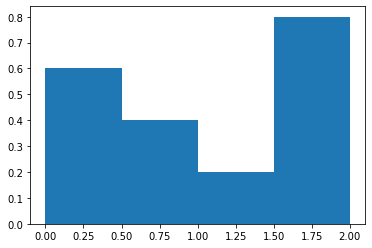

In [10]:
a=0
b=2
N=4
X=[0,0.2,0,3,  0.55,0.6,  1.1,   1.6,1.7,1.8,1.9]
# le vecteur X comporte 10 valeurs 
plt.hist(X,range=(a,b),bins=N,density=True)
print("X=",X)
plt.show()

**Graphique 2 :**

Y= [0, 0.2, 0.3, 0.55, 0.6, 1.1, 1.6, 1.7, 1.8, 1.9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


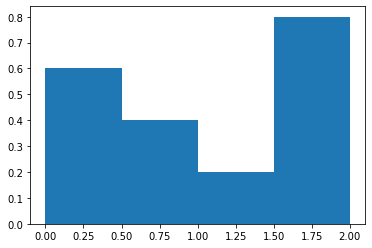

In [11]:
a=0
b=2
N=4
Y=[0,0.2,0.3,  0.55,0.6,  1.1,   1.6,1.7,1.8,1.9, 11,12,13,14,15,16,17,18,19,20]
# c'est le vecteur de l'exemple précédent auquel on a ajouté des valeurs sortant de [a,b]
# le vecteur Y comporte 20 valeurs 
plt.hist(Y,range=(a,b),bins=N,density=True)
print("Y=",Y)
plt.show()

**Questions**

1. Quelle est la fréquence des nombres compris dans les différentes classes ( [0;0,5[ ,[0,5;1[,[1;1,5[,[1.5;2] )  pour le vecteur X (graphique 1) ? Quelle est la hauteur de la colonne associée ? Comment expliquer vous cette différence ?


2. Quelle est la fréquence des nombres compris dans les différentes classes pour le vecteur Y (graphique 2) ?

**Remarques**

1.  Ce sont les aires des rectangles (et non leurs hauteurs) qui représentent les fréquences empiriques.
Cela signifie que l'aire totale est égale à 1. 

2. Ces graphiques sont les mêmes. "range(a,b)" n'est pas qu'indicateur pour l'affichage mais indique les valeurs à prendre en considération pour le calcul des fréquences empiriques : 
les valeurs sortant de l'intervalle [a,b] n'ont pas été prises en considération dans le calcul des fréquences empiriques. plt.hist fait comme si ces valeurs n'existaient pas.

Afin de comparer les fréquences empiriques de notre simulation de variable aléatoire géométrique et la densité de la loi géométrique, il nous faut **afficher sur un intervalle** pertinent l'histogramme des fréquences empiriques et cette densité.

Mais il faut que le calcul des fréquences empiriques soit fait à partir de *tout l'échantillon* et non pas à partir des observations qui "tombent" dans l'intervalle*.

Reprenons l'exemple avec le vecteur Y. Voila comment procéder pour que Python calcule l'histogramme en se basant sur tout le vecteur Y, mais ne l'affiche sur sur l'intervalle [0,2] : 


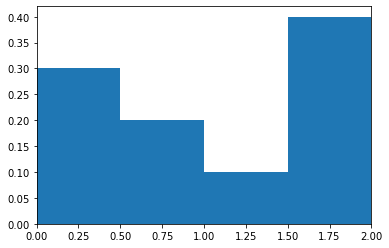

In [12]:
Y=[0,0.2,0.3,  0.55,0.6,  1.1,   1.6,1.7,1.8,1.9, 11,12,13,14,15,16,17,18,19,19.9]


a=0
b=20
N=40
## Ou pour pour faire faire automatiquement la même chose à Python :
# a=0
# b=math.floor(max(Y))+1
# N=int((b-a)/0.5)

# paramétrage de l'affichage
plt.xlim(0,2)  # on définit l'intervalle à afficher

plt.hist(Y,range=(a,b),bins=N,density=True) # l'histogramme est bien calculé à partir de
                                              # l'ensemble des valeurs de Y.
plt.show()

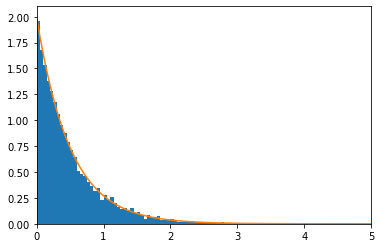

In [13]:
# Simulation de la variable 
lam=2
N=10000
E=exp(N,lam)

# tracé de l'histogramme et de la densité
# paramétrage de la plage de valeur prises en compte dans le calcul de l'histo (i.e. : toutes les valeurs)
a=0
b=math.floor(max(E))+1
Delta=0.05
N=int((b-a)/Delta)

# paramétrage la l'affichage
A=0
B=5
plt.xlim(A,B)

plt.hist(E,range=(a,b),bins=N,density=True)

x=np.linspace(A,B,101) # crée le vecteur [A, A+eps, A+2epx..... ,B] avec eps=(B-A)/100

plt.plot(x,lam*np.exp(-lam*x))  #


Avec $\lambda=100$

Copier-coller du programme précédent en
- modifiant le paramètre $\lambda$
- modifiant $\Delta$
- inserant le calcul de la moyenne et de l'espérance 


La moyenne empirique de notre variable vaut 0.010093671008846561 . L'espérance d'une variable aléatoire exponentielle de paramètre 100 vaut 0.01
La variance empirique de notre variable vaut 0.00010292718778169147 . La variance d'une variable aléatoire exponentielle de paramètre 100 vaut 0.0001


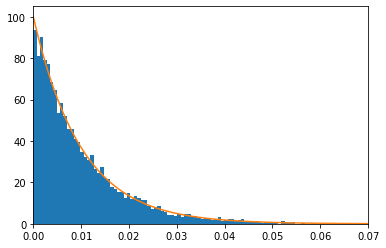

In [14]:
# Simulation de la variable 
lam=100
N=10000
E=exp(N,lam)

# Comparaison moyenne empirique/espérance et variance empirique/variance
print("La moyenne empirique de notre variable vaut", moy(E),#
      ". L'espérance d'une variable aléatoire exponentielle de paramètre",lam,"vaut",1/lam)
print("La variance empirique de notre variable vaut", var(E),#
      ". La variance d'une variable aléatoire exponentielle de paramètre",lam,"vaut",1/lam**2)

# tracé de l'histogramme et de la densité
# paramétrage de la plage de valeur prises en compte dans le calcul de l'histo (i.e. : toutes les valeurs)
a=0
b=math.floor(max(E))+1
Delta=0.0007
N=int(b/Delta)

# paramétrage la l'affichage
A=0
B=0.07
plt.xlim(A,B)

plt.hist(E,range=(a,b),bins=N,density=True)

x=np.linspace(A,B,101) # crée le vecteur [A, A+eps, A+2epx..... ,B] avec eps=(B-A)/100

plt.plot(x,lam*np.exp(-lam*x))  
plt.show()

## Simulation d'une variable aléatoire suivant la loi Gamma($\alpha$,$\beta$) 
(avec $\alpha\in\mathbb{N}$)

On peut définir une variable aléatoire de loi Gamma de paramètres $(\alpha,\beta)$ (avec $\alpha\in\mathbb{N}^*$, $\beta>0$) comme la somme de $\alpha$ v.a exponentielles indépendantes de paramètre $\beta$.

In [15]:
# Simulation d'une observation d'une va de loi Gamma de paramètres alpha , beta :
def GammaObs(alpha,beta):
    X=exp(alpha,beta) # Simulation d'un echantillon de alpha va exponentielle de parametre beta
    g=sum(X)
    return(g)

In [16]:
# Simulation de N observations d'une va de loi Gamma de paramètres alpha , beta :
def Gamma(N,alpha,beta):
    G=[]
    for k in range(N):
        g=GammaObs(alpha,beta)
        G.append(g)
    return(G)

Encore une fois voici des versions abregées des ces programmes 

In [17]:
def GammaObsV(alpha,beta):
    return sum(exp(alpha,beta))
  
def GammaV(N,alpha,beta):
    return [GammaObsV(alpha,beta) for k in range(N)]
               

In [18]:
#essai 
Gamma(3,10,3)

[2.9806146709933867, 3.1238441964135637, 2.364115644503865]

In [19]:
#essai
GammaV(3,10,3)

[6.098489187445134, 3.208064497860182, 3.4587080029977306]

On compare la moyenne et la variance empiriques avec l'espérance et la variance :

In [20]:
N=10000
alpha=9
beta=2
X=Gamma(N,alpha,beta)
print("La moyenne empirique de notre variable vaut", moy(X),#
      ". L'espérance d'une variable aléatoire Gamma de paramètres",alpha,",",beta,"vaut",alpha/beta)
print("La variance empirique de notre variable vaut", var(X),#
      ". La variance d'une variable aléatoire Gamma de paramètres",alpha,",",beta,"vaut",alpha/beta**2)

La moyenne empirique de notre variable vaut 4.491191065120703 . L'espérance d'une variable aléatoire Gamma de paramètres 9 , 2 vaut 4.5
La variance empirique de notre variable vaut 2.2322132181075993 . La variance d'une variable aléatoire Gamma de paramètres 9 , 2 vaut 2.25


Comparons maintenant les fréquences empiriques avec la densité

Pour la densité :
$$f(x)=\frac{x^{k-1}e^{-\frac{x}{\theta}}}{\Gamma(k)\theta^k}.$$

Notre $\alpha$ correspond au $k$

Notre $\beta$ à $\frac{1}{\theta}$

$\Gamma(k)=(k-1)!$

Donc avec nos notations :
$$f(x)=\frac{\beta^\alpha x^{\alpha-1}e^{-\beta x}}{(\alpha-1)!}.$$

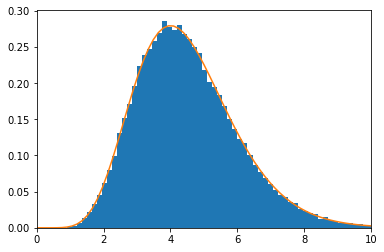

In [21]:
# simulation de la variable
N=100000
alpha=9
beta=2
G=Gamma(N,alpha,beta)

# tracé de l'histogramme et de la densité
a=0
b=math.floor(max(G))+1
N=int(b/0.15)

plt.xlim(0,10)
plt.hist(G,range=(a,b),bins=N,density=True)

A=0
B=15
x=np.linspace(A,B,100) 

denom=math.factorial(alpha-1)
plt.plot(x,x**(alpha-1)*beta**alpha*np.exp(-beta*x)/denom)  
plt.show()


avec $\alpha=1$ et $\beta=12$ 
Copier coller du programme précédent. On a juste

- changé les paramètres $\alpha$ et $\beta$ 
- inséré le calcul de la moyenne

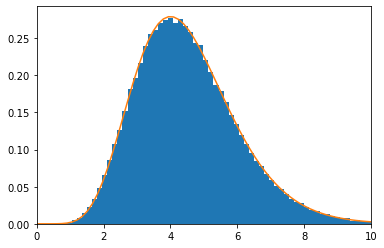

In [22]:
# simulation de la variable
N=100000
alpha=9
beta=2
G=Gamma(N,alpha,beta)

# tracé de l'histogramme et de la densité
a=0
b=math.floor(max(G))+1
N=int(b/0.15)

plt.xlim(0,10)
plt.hist(G,range=(a,b),bins=N,density=True)

A=0
B=15
x=np.linspace(A,B,100) 

denom=math.factorial(alpha-1)
plt.plot(x,x**(alpha-1)*beta**alpha*np.exp(-beta*x)/denom)  
plt.show()

## Simulation d'une variable aléatoire de Pareto

La densité d'une variable aléatoire de Pareto de paramètres $a$ et $b$ est 
$$f(x)=\frac{ab^a}{x^{a+1}}1_{[b,+\infty[}(x)$$

Pour $x>b$, on a 
$$
\begin{eqnarray}
F(x)&=&\int_b^x \frac{ab^a}{t^{a+1}} dt\\
    &=&\left[ -\frac{b^a}{t^{a}}\right]_b^x\\
    &=&1-\frac{b^a}{x^a}\\
\end{eqnarray}
$$

On a 
$$y=F(x)\Leftrightarrow \frac{b^a}{x^a}=1-y\Leftrightarrow \frac{b^a}{1-y}=x^a\Leftrightarrow\frac{b}{(1-y)^\frac{1}{a}}=x$$

On doit donc simuler une v.a uniforme sur [0,1] , $U$
et poser $X=\frac{b}{(1-U)^\frac{1}{a}}$.

**Question**

Notons que dans le sujet de TP, on nous propose de simuler une v.a de Pareto en posant  $X=\frac{b}{U^\frac{1}{a}}$. Qu'en pensez-vous ? 

In [7]:
# Simulation d'une observation d'une va de Pareto :
def ParetoObs(alpha,beta):
    U=random.random()
    P=beta/U**(1/alpha)
    return(P)

# Simulation d'une variable de Pareto
def Pareto(N,alpha,beta):
    P=[]
    for k in range(N):
        p=ParetoObs(alpha,beta)
        P.append(p)
    return(P)

In [9]:
# Un essai
Pareto(10,2,3)

[6.773053080796608,
 5.812231341438262,
 3.752667647209195,
 4.393986781749052,
 6.202569943205345,
 5.457221995254741,
 3.34742127790719,
 3.9129170305039715,
 6.038172169759685,
 3.540485600037125]

Comparaison de la moyenne :

Attention 
- l'espérance et la variance données dans les sujets de TP ne sont pas les bonnes.
- l'espérance (resp. la variance) d'une v.a. de Pareto n'est défnie que pour $\alpha>1$ (resp. $\alpha>2$).

In [12]:
N=1000
alpha=9
beta=2
P=Pareto(N,alpha,beta)
print("La moyenne empirique de notre variable vaut", moy(P),#
      ". L'espérance d'une variable aléatoire de Pareto de paramètre",alpha,",",beta,"vaut",alpha*beta/(alpha-1))
print("La variance empirique de notre variable vaut", var(P),#
      ". La variance d'une variable aléatoire de Pareto de paramètre",alpha,beta,"vaut",alpha*beta**2/((alpha-1)**2*(alpha-2)))

La moyenne empirique de notre variable vaut 2.24986395129347 . L'espérance d'une variable aléatoire de Pareto de paramètre 9 , 2 vaut 2.25
La variance empirique de notre variable vaut 0.08385038957542257 . La variance d'une variable aléatoire de Pareto de paramètre 9 2 vaut 0.08035714285714286


Il me parait plus pertinent d'avoir un affichage qui "commence" un peu avant 2 afin de vérifier que le support semble être le bon.

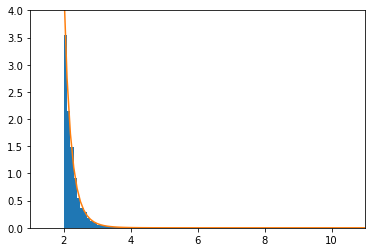

In [14]:
# Simulation de la variable 
alpha=9
beta=2
N=10000
P=Pareto(N,alpha,beta)

# tracé de l'histogramme et de la densité
# paramétrage de la plage de valeur prises en compte dans le calcul de l'histo (i.e. : toutes les valeurs)
a=0
b=math.floor(max(P))+1
Delta=0.1
N=int(b/Delta)

# paramétrage de l'affichage
A=1
B=11  
plt.xlim(A,B)
plt.ylim(0,4)  #il faut décommmenter la ligne pour "restreindre" 
                #un peu l'affichage en y et que l'affichage soit lisible 


plt.hist(P,range=(a,b),bins=N,density=True)

x=np.linspace(A,B,101) 

plt.plot(x,alpha*beta**alpha/x**(alpha+1))  

Avec $\alpha=2$, $\beta=1$ :

Copier coller du programme précédent. On a juste

- changer les paramètres $\alpha$ et $\beta$ 
- modifier un peu les paramètre de la fenètre d'affichage 
- insérer le calcul de la moyenne

La moyenne empirique de notre variable vaut 1.9884548242884597 . L'espérance d'une variable aléatoire de Pareto de paramètre 2 , 1 vaut 2.0


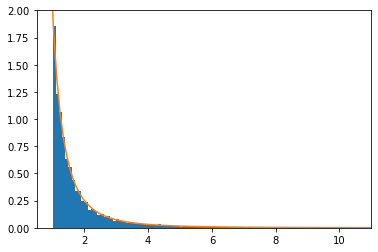

In [15]:
# Simulation de la variable 
alpha=2
beta=1
N=10000
P=Pareto(N,alpha,beta)

# Comparaison moyenne empirique / espérance
print("La moyenne empirique de notre variable vaut", moy(P),#
      ". L'espérance d'une variable aléatoire de Pareto de paramètre",alpha,",",beta,"vaut",alpha*beta/(alpha-1))


# tracé de l'histogramme et de la densité
# paramétrage de la plage de valeur prises en compte dans le calcul de l'histo (i.e. : toutes les valeurs)
a=0
b=math.floor(max(P))+1
Delta=0.1
N=int(b/Delta)

# paramétrage de l'affichage
A=0.5
B=11  
plt.xlim(A,B)
plt.ylim(0,2)


plt.hist(P,range=(a,b),bins=N,density=True)

x=np.linspace(A,B,101) 

plt.plot(x,alpha*beta**alpha/x**(alpha+1))  